# Lista de Tópicos de Física Teórica

In [1]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
N = 1_000_000


In [2]:
def hist(bins, valores):
    bins = 100
    maximo = max(valores)
    minimo = min(valores)
    delta = (maximo - minimo)/bins
    histograma = [0]*(bins+1)
    for valor in valores:
        histograma[int((valor - minimo)/delta)] += 1
    histograma  = [x/N for x in histograma]
    return histograma,[minimo + i*delta for i in range(bins+1)]


# Problema 1

Em sistemas termodinâmicos, a distribuição de Boltzmann descreve a probabilidade de encontrar um sistema em um estado específico com energia $E$. Este conceito é fundamental para entender fenômenos como equilíbrio térmico e a distribuição de partículas em diferentes níveis de energia.

Considere a distribuição de Boltzmann para o problema do oscilador harmônico clássico:

$P(x) \propto e^{-\beta E(x)}, \quad \text{com} \quad E(x) = \frac{1}{2}kx^2$,

onde $\beta = \frac{1}{k_B T}$, $k_B$ é a constante de Boltzmann e $T$ é a temperatura. Sob estas condições, a distribuição de equilíbrio para a coordenada $x$ é gaussiana, com média zero e variância $\sigma^2 = \frac{1}{\beta k}$.

1. **(a)** Gere valores aleatórios de $x$ a partir de uma distribuição uniforme e aceite-os com probabilidade proporcional a $P(x)$ (método de rejeição). Assim, obtém-se uma amostra de valores de $x$ que devem refletir a distribuição de Boltzmann.

2. **(b)** Crie um histograma dos valores simulados de $x$ e normalize-o para estimar a densidade de probabilidade empírica.

3. **(c)** Sobreponha a curva teórica da distribuição de Boltzmann, dada por:

   $P_{\text{teórica}}(x) = \sqrt{\frac{\beta k}{2\pi}} \exp\left(-\frac{\beta k x^2}{2}\right).$

4. **(d)** Calcule a média e a variância da amostra obtida e compare com os valores teóricos:

   $\mathbb{E}[x] = 0, \quad \text{Var}(x) = \frac{1}{\beta k}.$

5. **(e)** Realize os testes estatísticos de Kolmogorov-Smirnov (K-S) e qui-quadrado para avaliar quantitativamente se as amostras são consistentes com a distribuição teórica.

6. **(f)** Crie um Q-Q plot para fornecer uma ferramenta visual adicional de comparação entre a distribuição empírica e a distribuição teórica. Dessa forma, além da inspeção visual (histograma e curva teórica), a média, a variância, bem como os testes estatísticos e o Q-Q plot, fornecerão evidências quantitativas e gráficas da qualidade da aproximação Monte Carlo à solução analítica.


In [3]:
def V(x):
    return pow(x,4) - 4*pow(x,2)
def dV(x):
    return 4*pow(x,3) - 8*x


In [4]:
# generate random number in normal distribution with mean 0 and variance 2D
def random_normal(D):
    return random.gauss(0, 2*D)


In [6]:
anterior = 100
x = 10
dt = 1e-4
gamma = 1
D = 5
random.seed(42)
passo = 0
lista = []
while(True):
    anterior = x
    x += dt*(-1/gamma*dV(x) + random_normal(D))
    if(abs(anterior-x)<1e-6):
        passo += 1
        lista.append(x)
    if(passo == 10000):
        break
histograma,arr = hist(100, lista)
print(sum(lista)/len(lista))


1.4141049584799408


[7.990532362902206e+303, 1.0258075766643985e+304, 1.310537836886749e+304, 1.6661715772930671e+304, 2.107994094958931e+304, 2.6539429095912307e+304, 3.3249053037238633e+304, 4.1450091735425246e+304, 5.141895045442266e+304, 6.34695463105573e+304, 7.795518840213446e+304, 9.526975885610828e+304, 1.1584798160015222e+305, 1.4016455134875467e+305, 1.6873188823164094e+305, 2.0209628581772324e+305, 2.408322340796705e+305, 2.8553472599814984e+305, 3.3680939856027072e+305, 3.9526041686780775e+305, 4.61476084225583e+305, 5.3601225083116e+305, 6.193736973898905e+305, 7.119937848733981e+305, 8.142127837526328e+305, 9.262554202757699e+305, 1.0482082975780416e+306, 1.179997958624253e+306, 1.3213704487379183e+306, 1.4718733001104643e+306, 1.6308408919641886e+306, 1.7973841315227747e+306, 1.9703853476105867e+306, 2.14849918739927e+306, 2.3301601568216814e+306, 2.5135972483934573e+306, 2.696855861515172e+306, 2.877826947600686e+306, 3.054283016189636e+306, 3.2239203316379206e+306, 3.3844063278266964e+306

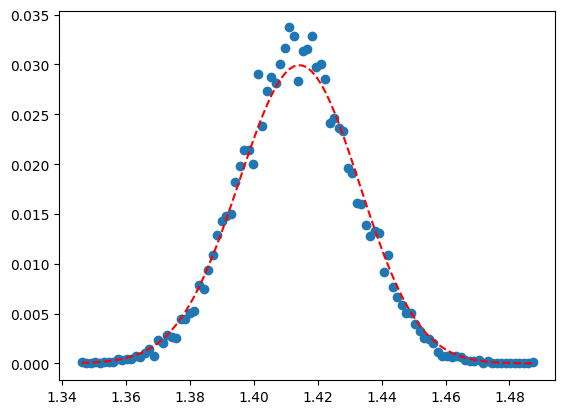

In [18]:
total = sum(histograma)
histograma = [x/total for x in histograma]
plt.scatter(arr,histograma)
y = [pow(math.e,-V(x)*176.5) for x in arr]
print(y)
total = sum(y)
y = [x/total for x in y]
plt.plot(arr,y,'--',c = 'red')
plt.show()


## Problema 3

A constante de Stefan-Boltzmann, $\sigma$, relaciona a energia total emitida por um corpo negro com sua temperatura. Ela é dada por:

$\sigma = \frac{\pi^2 k_B^4}{60 \hbar^3 c^2} \cdot \zeta(4),$

onde $\zeta(s)$ é a função zeta de Riemann. A função zeta de Riemann pode ser expressa na forma integral:

$\zeta(s) = \frac{1}{\Gamma(s)} \int_{0}^{\infty} x^{s-1} e^{-x} \frac{1}{1 - e^{-x}} \, dx,$

onde $\Gamma(s) = (s-1)!$ é a função Gamma. Utilizando **importance sampling**, gere amostras aleatórias de $x$ de uma distribuição exponencial, $\omega(x) = e^{-x}$ para $x \geq 0$, que corresponde ao termo $e^{-x}$ no integrando. Reescreva a integral como:

$\zeta(s) = \frac{1}{\Gamma(s)} \mathbb{E}\left[ \frac{x^{s-1}}{1 - e^{-x}} \right].$

Compare seu resultado de Monte Carlo com o valor exato:

$\zeta(4) = \frac{\pi^4}{90}.$


In [ ]:
a = 0
s = 4
for i in range(N):
    x = math.log(1 - random.random())
    a += pow(x, s-1)/(1 -  pow(math.e, -x))*pow(math.e, -x)
a /= N
a *= 1/math.factorial(s-1)
print(a,pow(math.pi, s)/90)


## Problema 4

Considere a integral de uma função $f(x)$ em um espaço de $d$ dimensões. A integral pode ser expressa como:

$I = \int_{[0,1]^d} f(x) \, dx.$

1. **(a)** Utilize o método de Monte Carlo para estimar a integral acima. Gere $N$ vetores $\mathbf{x}$ com componentes uniformemente distribuídas no intervalo $[0,1]$ para $d = 1$ e $f(x) = e^{-|\mathbf{x}|^2}$.

2. **(b)** Para diferentes valores de $d$ ($d = 2, 6, 10$), estude como o número de amostras $N$ necessário para alcançar uma precisão desejada varia com a dimensionalidade.

3. **(c)** Calcule o erro padrão da média para cada caso e analise a taxa de convergência.


In [128]:
# (N,2) random points in the unit square
def Q4(N,d):
    d = 2
    points = np.random.rand(N, d)
    # square module of the points
    module = np.linalg.norm(points, axis=1)
    module = np.power(module, 2)
    f = np.exp(-module)
    Real = 0.7468**d
    Result = np.mean(f)
    MEAN_ERROR = np.std(f)/np.sqrt(N)
    Error = np.abs(Real - Result)/Real
    return Error,MEAN_ERROR


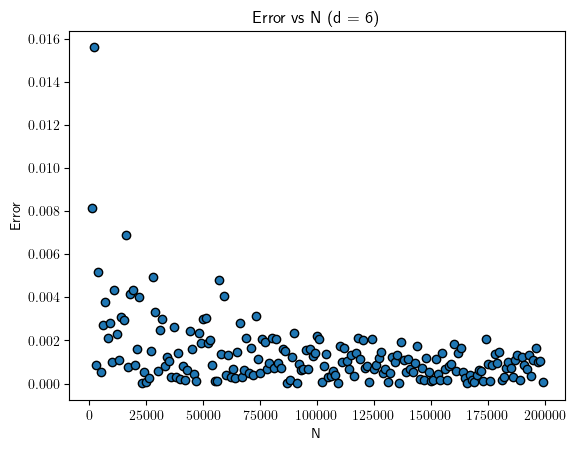

In [138]:
n = np.arange(1000, 200_000, 1000)
d = 6
error6 = [Q4(int(i),d) for i in n]
error6 = np.array(error6)
plt.scatter(n, error6[:,0], c='tab:blue',edgecolors='k', label='Error')
plt.xlabel('N')
plt.ylabel('Absolute Error')
plt.title(f'Error vs N (d = {d})')
plt.show()


In [141]:
n = np.arange(1000, 200_000, 1000)
d = 10
error10 = [Q4(int(i),d) for i in n]
error10 = np.array(error10)


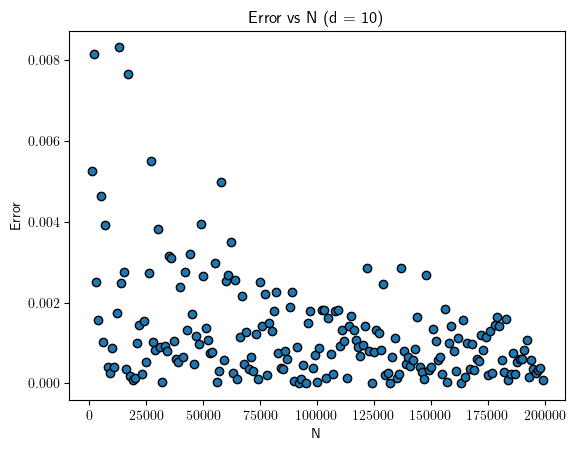

In [ ]:
plt.scatter(n, error10[:,0], c='tab:blue',edgecolors='k', label='Error')
plt.xlabel('N')
plt.ylabel('Absolute Error')
plt.title(f'Error vs N (d = {d})')
plt.show()


In [144]:
n = np.arange(1000, 200_000, 1000)
d = 4
error4 = [Q4(int(i),d) for i in n]
error4 = np.array(error4)


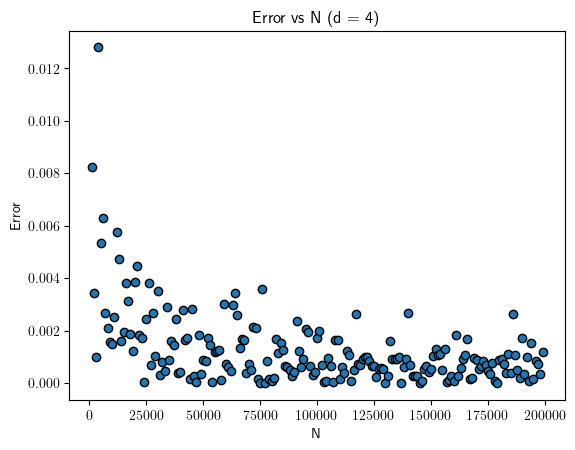

In [145]:
plt.scatter(n, error4[:,0], c='tab:blue',edgecolors='k', label='Error')
plt.xlabel('N')
plt.ylabel('Absolute Error')
plt.title(f'Error vs N (d = {d})')
plt.show()


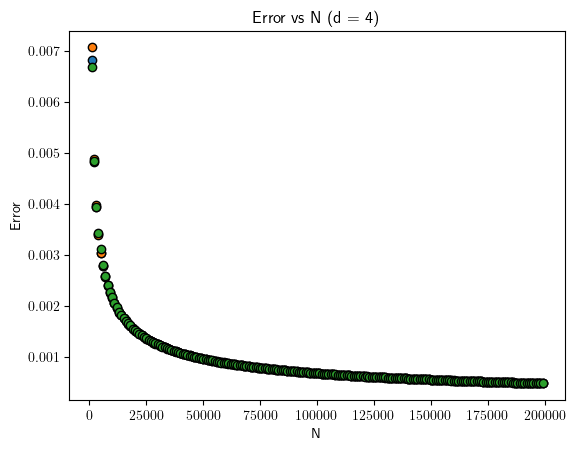

In [146]:
plt.scatter(n, error4[:,1],edgecolors='k', label='Error')
plt.scatter(n, error6[:,1],edgecolors='k', label='Error')
plt.scatter(n, error10[:,1],edgecolors='k', label='Error')

plt.xlabel('N')
plt.ylabel('Error')
plt.title(f'Error vs N (d = {d})')
plt.show()


## Problema 5

Em física de partículas, distribuições angulares podem descrever a probabilidade de observação de partículas em diferentes direções após colisões de alta energia. Como exemplo, considere a reação de aniquilação entre um elétron e um pósitron para formar um par de múons ($\mu^+ \mu^-$). A probabilidade de observar um múon em um determinado ângulo $\theta$ (medido a partir da direção do elétron incidente) é proporcional a:

$P(\theta) \propto 1 + \cos^2(\theta), \quad 0 \leq \theta \leq \pi.$

Sob essas condições, o problema propõe a geração de amostras do ângulo $\theta$ cuja distribuição segue a função de probabilidade acima usando métodos de Monte Carlo.

1. **(a)** Normalize a distribuição de probabilidades $P(\theta)$, determinando o fator de normalização.

2. **(b)** Implemente um método de amostragem para gerar valores de $\theta$ que sigam $P(\cos \theta)$ utilizando métodos de Monte Carlo por rejeição, ou seja, sorteie ângulos $\theta$ uniformemente distribuídos em $[0, \pi]$. Assim, gere números aleatórios uniformes para decidir se cada $\theta$ proposto é aceito com base em sua probabilidade relativa $1 + \cos^2(\theta)$.

3. **(c)** Crie um histograma dos valores de $\theta$ obtidos e compare com a distribuição teórica $P(\theta)$. Compare seu resultado com a Figura 13.2 de [1].

4. **(d)** Calcule a média e a variância das amostras obtidas e compare com os valores teóricos para a distribuição normalizada.

5. **(e)** Realize testes estatísticos como Kolmogorov-Smirnov (K-S) e qui-quadrado para avaliar quantitativamente se as amostras obtidas são consistentes com a distribuição teórica.


In [53]:

def P(x):
    return 2/(3*math.pi)*(1 + math.cos(x)*math.cos(x))
def F(x):
    return (1 + math.cos(x)*math.cos(x))



In [121]:
valores = []
M = 0.05
while(len(valores) < N):
    THETA = random.uniform(0, math.pi)
    if(M*F(THETA) > random.uniform(0, 1) ):
        valores.append(THETA)


In [122]:
bins = 100
maximo = max(valores)
minimo = min(valores)
delta = (maximo - minimo)/bins
histograma = [0]*(bins+1)
for valor in valores:
    histograma[int((valor - minimo)/delta)] += 1
histograma_normalizado  = [x/(N*delta) for x in histograma]


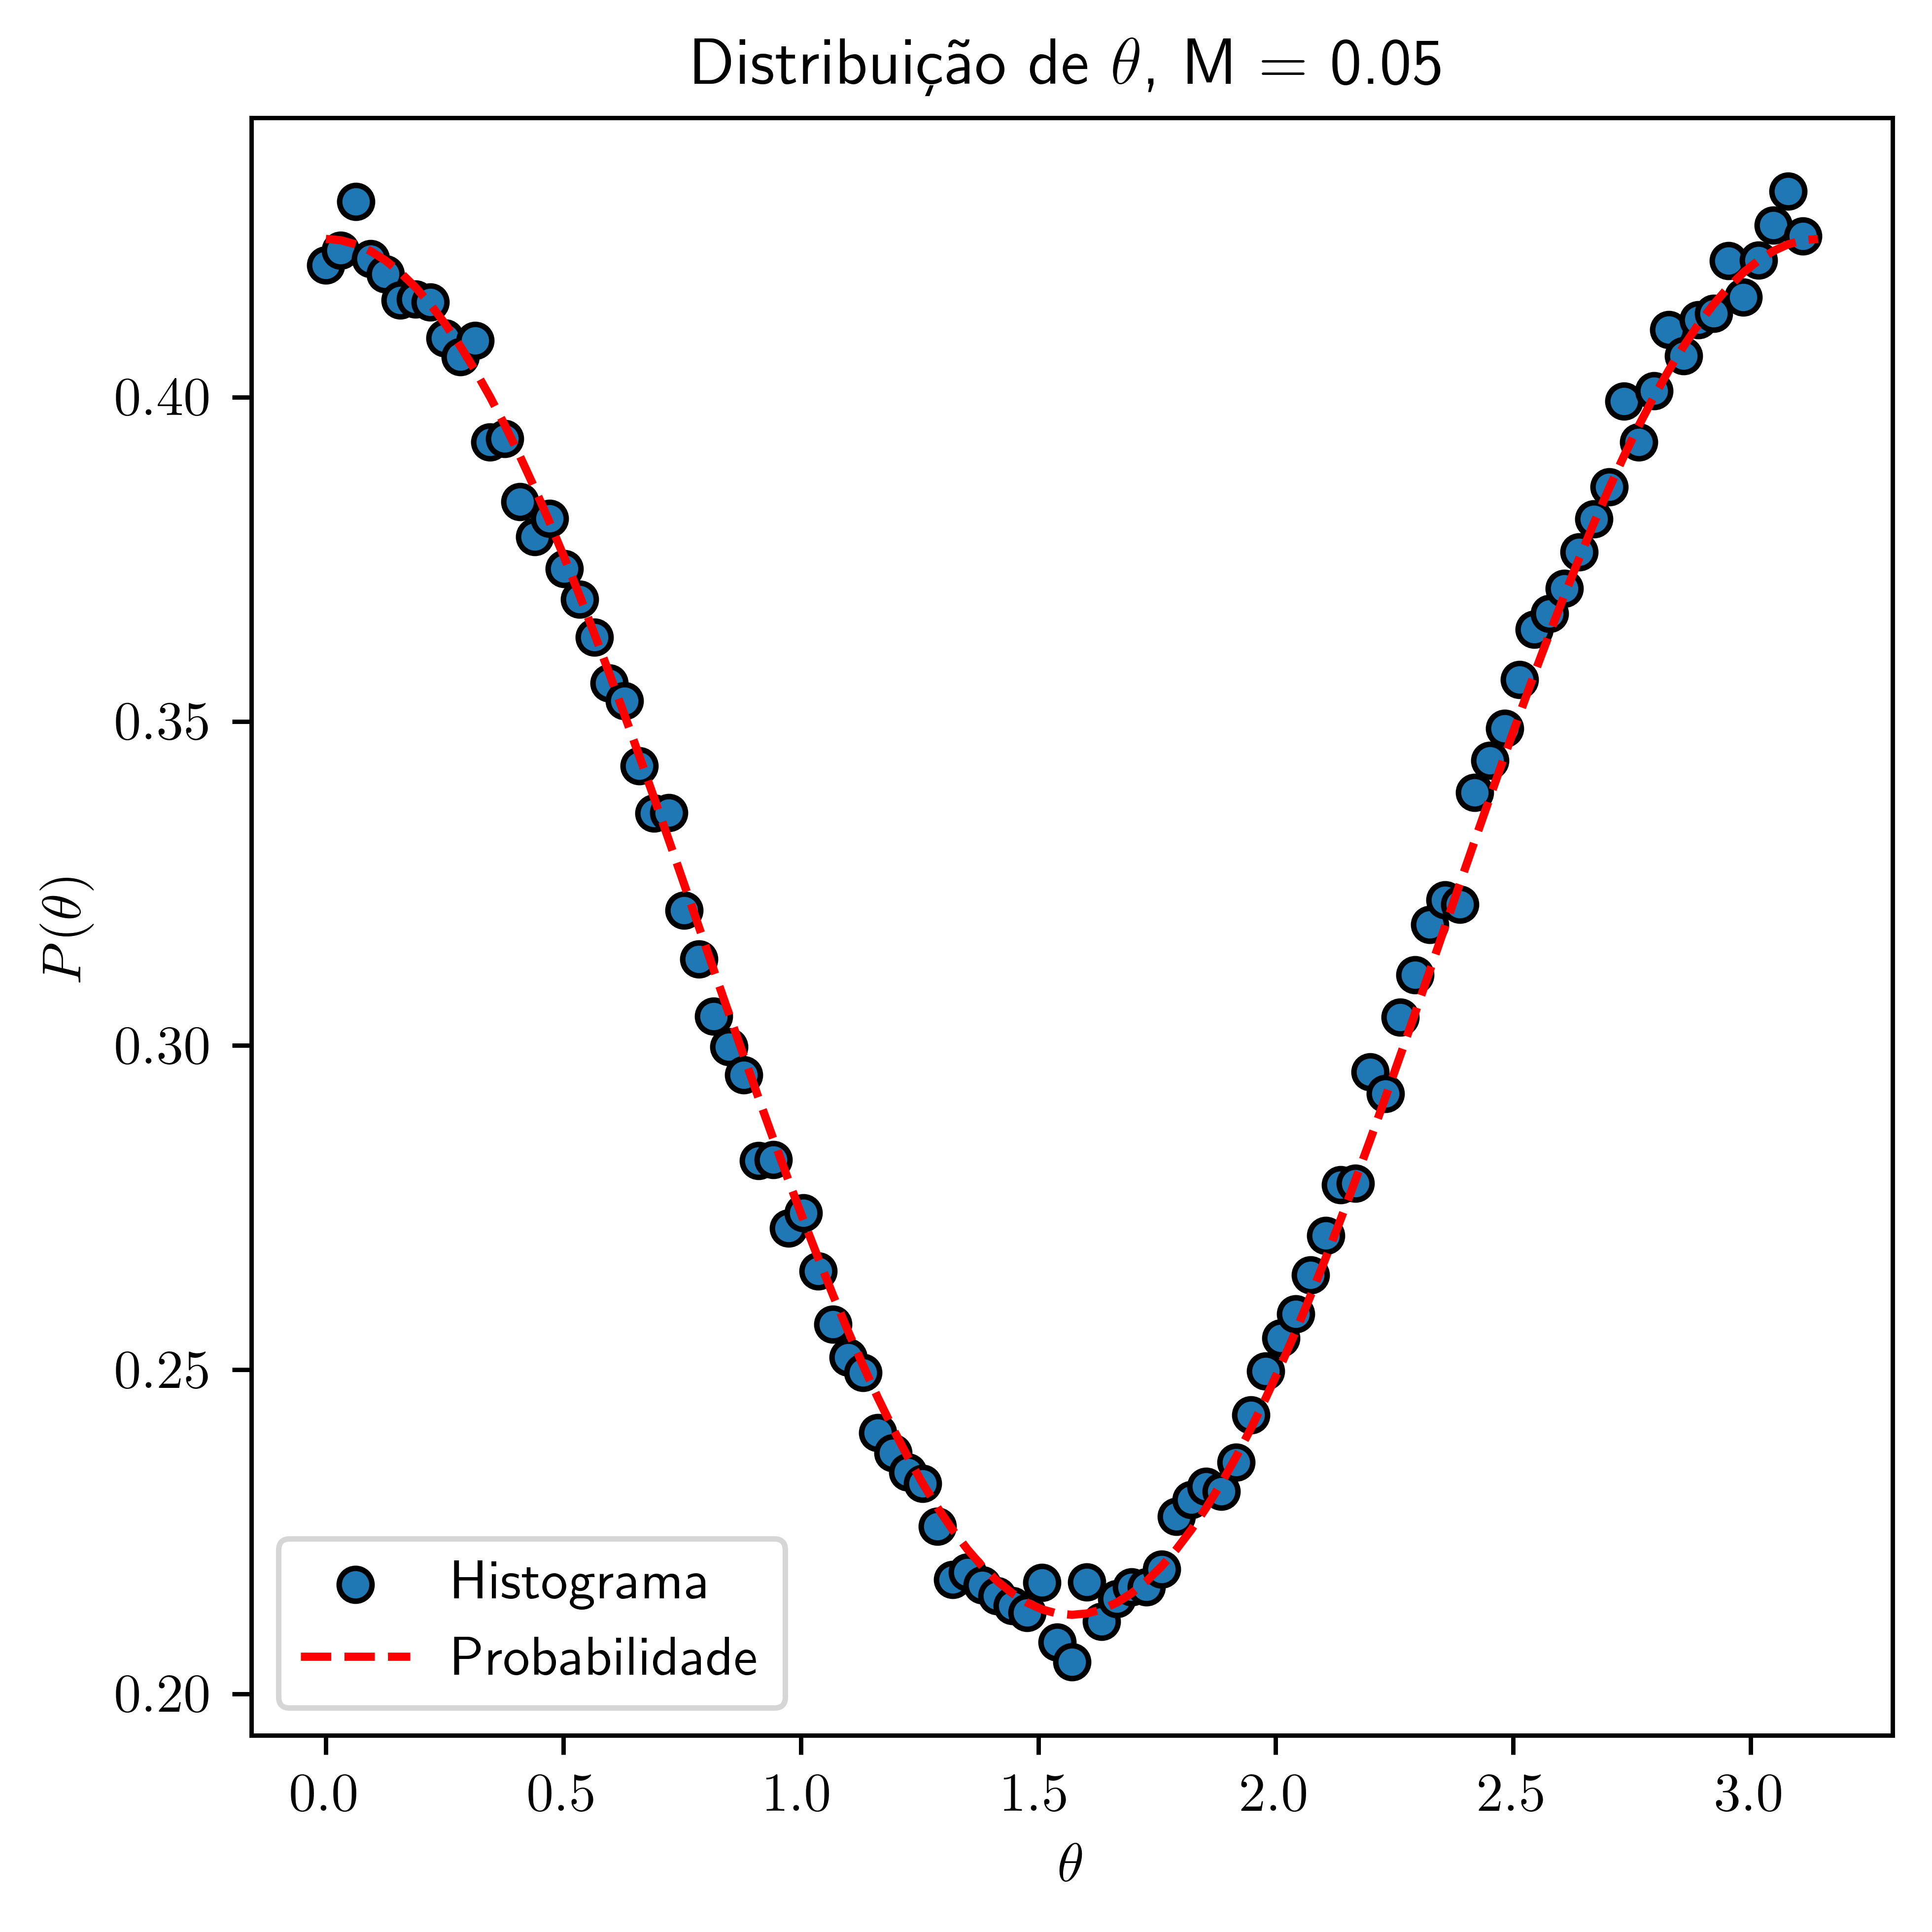

In [123]:
plt.figure(figsize=(5, 5), dpi=800)
# latex style
plt.rc('text', usetex=True)
plt.scatter(
    [minimo + i*delta for i in range(bins+1)][:-1], 
    histograma_normalizado[:-1],
    edgecolors='k',
    color = 'tab:blue',
    label = f'Histograma'
)
y = [P(minimo + i*delta) for i in range(bins+1)]
y = sum(y)
plt.plot(
    [minimo + i*delta for i in range(bins+1)],
    [P(minimo + i*delta) for i in range(bins+1)],
    '--',
    c = 'red',
    label = f'Probabilidade'
)
plt.legend(loc = 'best')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$P(\theta)$')
plt.title(rf'Distribuição de $\theta$, M = {M}')
plt.tight_layout()
plt.savefig(f'distribuicao_theta_{M}.png')
plt.show()


In [31]:
# calculate mean of valores
print("Média e Variância da distribuição de theta")
mean = sum(valores)/N
# calculate the std
std = math.sqrt(sum([(x - mean)**2 for x in valores])/N)
var = sum([(x - mean)**2 for x in valores])/N
print(mean,var)
print("Média e Variância teórica da distribuição de theta")
x2 = 2/3*(math.pi*math.pi/3 + (2*math.pi*math.pi + 3)/12)

print(math.pi/2,x2 - pow(math.pi/2,2))


Média e Variância da distribuição de theta
1.5700544397899918 0.9883566278920212
Média e Variância teórica da distribuição de theta
1.5707963267948966 0.9891337000907798


In [100]:
sample1 = histograma
sample2 = [P(minimo + i*delta)/y for i in range(bins+1)]


In [101]:
def empirical_cdf(data, x):
    """Calcula a função de distribuição acumulada empírica (ECDF) para um dado conjunto de dados."""
    return np.sum(data <= x) / len(data)


In [102]:
def ks_test(data1, data2):
    """
    Implementa o teste de Kolmogorov-Smirnov para comparar duas distribuições.

    Parâmetros:
        data1: array-like, primeiro conjunto de dados
        data2: array-like, segundo conjunto de dados

    Retorno:
        d_statistic: float, estatística D do teste
        p_value: float, valor-p aproximado (para amostras suficientemente grandes)
    """
    # Ordenar os dados
    data1 = np.sort(data1)
    data2 = np.sort(data2)

    # Combinar os dados em um único array ordenado
    combined_data = np.sort(np.concatenate([data1, data2]))

    # Calcular as ECDFs para cada ponto em combined_data
    ecdf1 = np.array([empirical_cdf(data1, x) for x in combined_data])
    ecdf2 = np.array([empirical_cdf(data2, x) for x in combined_data])
    
    # Estatística D: máxima diferença entre as duas ECDFs
    d_statistic = np.max(np.abs(ecdf1 - ecdf2))

    # Aproximação do valor-p para amostras grandes (baseado na distribuição de Kolmogorov)
    n1, n2 = len(data1), len(data2)
    n_eff = (n1 * n2) / (n1 + n2)
    p_value = 2 * np.exp(-2 * (d_statistic ** 2) * n_eff)

    return d_statistic, p_value


In [105]:
d_stat, p_val = ks_test(sample1, sample2)

print(f"Estatística D: {d_stat:.4f}")
print(f"Valor-p: {p_val:.4f}")
alpha = 0.05  # Nível de significância
if p_val > alpha:
    print("Aceitamos a hipótese nula: as distribuições são semelhantes.")
else:
    print("Rejeitamos a hipótese nula: as distribuições são diferentes.")


Estatística D: 0.0990
Valor-p: 0.7431
Aceitamos a hipótese nula: as distribuições são semelhantes.


In [70]:
distribuicao = []
count = 0
for i in histograma[:-1]:
    count += 1
    distribuicao += [count]*i
teorico = []
count = 0
for i in [P(minimo + j*delta) for j in range(bins+1)][:-1]:
    count += 1
    teorico += [count]*math.floor(i*N*delta)


In [72]:
teorico = teorico[:len(distribuicao)]


In [99]:
def chi2_cdf(x, k, terms=100):
    if k % 2 != 0:
        raise ValueError("Este método suporta apenas graus de liberdade pares.")
    
    # Calcular a função gama completa para k/2
    
    # Aproximar a CDF usando uma série
    cdf = 0
    for n in range(terms):
        # Logaritmo do termo
        log_term = n * math.log(x / 2) - (x / 2) - math.log(math.factorial(n))
        # Exponencial do logaritmo
        cdf += math.exp(log_term)

    return cdf


In [102]:
# Verificar se os vetores têm o mesmo tamanho


# Calcular a estatística qui-quadrado
chi2_stat = sum((o - e) ** 2 / e for o, e in zip(distribuicao, teorico))

# Determinar os graus de liberdade
df = len(distribuicao) - 1

# Calcular o p-valor
p_value = 1 - chi2_cdf(chi2_stat, df)

# Resultado final
print("Estatística Qui-Quadrado:", chi2_stat)
print("Graus de Liberdade:", df)
print("p-valor:", p_value)
# Check final com nível de significância
alpha = 0.05  # Nível de significância padrão
if p_value < alpha:
    print("Isso significa que há evidências suficientes para concluir que as distribuições observada e teórica são significativamente diferentes.")
else:
    print("Isso significa que não há evidências suficientes para concluir que as distribuições observada e teórica são significativamente diferentes.")


Estatística Qui-Quadrado: 3566.4460738146895
Graus de Liberdade: 999898
p-valor: 1.0
Isso significa que não há evidências suficientes para concluir que as distribuições observada e teórica são significativamente diferentes.
